**IMPORTING THE LIBRARIES:**

In [ ]:
#import the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # support vector machine and support vector classifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,classification_report,confusion_matrix

from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**UPLOAD THE DATASET**

In [ ]:
#load the data setand the shape:

gast=pd.read_csv('/content/drive/MyDrive/Gastric.csv')
print('The shape of the gastric is:',gast.shape)

The shape of the gastric is: (30, 4524)


In [ ]:
#showing the data:

gast.head()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,Z84721_cds2_at,Z86000_at,Z93784_at,Z94753_s_at,Z95624_at,Z96810_at,Z97054_xpt2_at,Z97074_at,sample,class
0,23.7,7.9,37.5,41.5,74.8,19.2,31.8,204.1,30.5,85.3,...,1591.3,107.0,74.2,57.3,11.4,1.0,136.3,30.2,n03,Normal
1,43.7,9.4,73.7,66.1,104.3,33.9,67.8,216.8,23.6,68.5,...,647.9,93.6,70.8,45.7,15.6,13.1,133.0,38.7,n04,Normal
2,16.7,3.9,202.3,81.7,157.4,22.6,42.9,280.4,12.5,85.4,...,228.2,58.1,61.2,12.2,10.4,7.1,149.2,27.2,n09,Normal
3,29.9,17.5,31.2,68.2,164.8,25.9,19.8,216.5,11.3,73.1,...,264.3,86.1,65.2,22.0,18.2,9.2,101.8,36.6,n12,Normal
4,42.2,7.2,33.6,37.3,100.8,25.7,34.5,246.3,7.6,78.0,...,462.0,99.8,46.9,25.2,15.1,6.2,139.1,15.0,n16,Normal


In [ ]:
gast['class'].unique()

array(['Normal', 'Diffuse', 'Intestinal'], dtype=object)

In [ ]:
gast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 4524 entries, A28102_at to class
dtypes: float64(4522), object(2)
memory usage: 1.0+ MB


In [ ]:
#missing values:

gast.isnull().sum()

A28102_at         0
AB000114_at       0
AB000115_at       0
AB000220_at       0
AB000409_at       0
                 ..
Z96810_at         0
Z97054_xpt2_at    0
Z97074_at         0
sample            0
class             0
Length: 4524, dtype: int64

In [ ]:
# describe the given data:
gast.describe()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,Z84497_s_at,Z84718_cds1_at,Z84721_cds2_at,Z86000_at,Z93784_at,Z94753_s_at,Z95624_at,Z96810_at,Z97054_xpt2_at,Z97074_at
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,32.213333,11.070000,110.313333,81.866667,121.910000,32.176667,55.550000,246.510000,24.783333,74.956667,...,69.430000,34.96000,348.833333,74.730000,73.993333,22.940000,12.856667,11.533333,139.210000,43.640000
std,20.408006,9.787083,91.410762,53.430879,36.451946,14.724169,23.078722,39.858909,13.178302,24.414420,...,21.365863,58.62883,336.436281,17.050152,23.277011,11.588627,3.937677,9.197351,34.746732,17.105405
min,6.100000,1.300000,28.700000,14.800000,53.100000,2.700000,19.800000,174.700000,7.600000,45.700000,...,46.900000,3.30000,38.700000,50.500000,28.600000,8.800000,4.100000,1.000000,64.300000,15.000000
25%,20.250000,5.750000,41.825000,47.400000,98.175000,22.775000,38.125000,216.575000,14.975000,62.250000,...,51.850000,5.72500,132.300000,60.500000,59.250000,17.025000,10.650000,3.300000,127.050000,30.600000
50%,27.900000,8.900000,74.150000,67.150000,116.900000,28.700000,53.050000,240.750000,23.100000,69.450000,...,64.550000,8.65000,251.450000,74.750000,69.050000,20.700000,12.250000,10.800000,136.750000,39.000000
75%,32.000000,11.850000,156.675000,97.925000,139.450000,36.200000,73.700000,266.775000,29.250000,75.625000,...,73.600000,30.62500,511.875000,85.175000,92.500000,24.875000,15.100000,17.000000,149.425000,51.700000
max,90.700000,42.700000,385.500000,294.100000,239.700000,75.400000,104.700000,353.100000,63.600000,158.900000,...,125.000000,275.60000,1591.300000,108.100000,119.300000,57.300000,21.500000,35.100000,237.600000,82.800000


**LABEL ENCODER:**

In [ ]:
#lable encoder to change the categorical variable to numeric values:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Assuming 'class' is the column you want to encode
gast['class'] = label_encoder.fit_transform(gast['class'])
gast['sample'] = label_encoder.fit_transform(gast['sample'])

In [ ]:
gast.head()

,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,Z84721_cds2_at,Z86000_at,Z93784_at,Z94753_s_at,Z95624_at,Z96810_at,Z97054_xpt2_at,Z97074_at,sample,class
0,23.7,7.9,37.5,41.5,74.8,19.2,31.8,204.1,30.5,85.3,...,1591.3,107.0,74.2,57.3,11.4,1.0,136.3,30.2,0,2
1,43.7,9.4,73.7,66.1,104.3,33.9,67.8,216.8,23.6,68.5,...,647.9,93.6,70.8,45.7,15.6,13.1,133.0,38.7,1,2
2,16.7,3.9,202.3,81.7,157.4,22.6,42.9,280.4,12.5,85.4,...,228.2,58.1,61.2,12.2,10.4,7.1,149.2,27.2,2,2
3,29.9,17.5,31.2,68.2,164.8,25.9,19.8,216.5,11.3,73.1,...,264.3,86.1,65.2,22.0,18.2,9.2,101.8,36.6,3,2
4,42.2,7.2,33.6,37.3,100.8,25.7,34.5,246.3,7.6,78.0,...,462.0,99.8,46.9,25.2,15.1,6.2,139.1,15.0,4,2


**VISUALIZATION (HEAT MAP):**

In [ ]:
# Calculate correlation matrix
correlation_matrix = gast.corr()

# Extract column names with correlation coefficient greater than 0.7 for a specific target column
target_column = 'class'
high_corr_columns = correlation_matrix[target_column][correlation_matrix[target_column] > 0.7].index.tolist()

# Display the column names with correlation coefficient greater than 0.7
print(f"Columns with correlation coefficient > 0.7 for '{target_column}': {high_corr_columns}")

Columns with correlation coefficient > 0.7 for 'class': ['AB006782_at', 'AC002077_at', 'D26129_at', 'D87742_at', 'J04794_at', 'L13744_at', 'M12759_at', 'M62628_s_at', 'S68616_at', 'U19948_at', 'U21931_at', 'U59752_at', 'U66052_at', 'U66702_at', 'U70663_at', 'X05997_at', 'X52003_at', 'X53961_at', 'X66839_at', 'X69920_s_at', 'X96752_at', 'Z29574_at', 'class']


In [ ]:
# Select the columns you want for the heatmap
selected_columns = ['AB006782_at', 'AC002077_at', 'D26129_at', 'D87742_at', 'J04794_at', 'L13744_at', 'M12759_at', 'M62628_s_at', 'S68616_at', 'U19948_at', 'U21931_at', 'U59752_at', 'U66052_at', 'U66702_at', 'U70663_at', 'X05997_at', 'X52003_at', 'X53961_at', 'X66839_at', 'X69920_s_at', 'X96752_at', 'Z29574_at','class']
heatmap_data = gast[selected_columns]

In [ ]:
correlation_matrix = heatmap_data.corr()

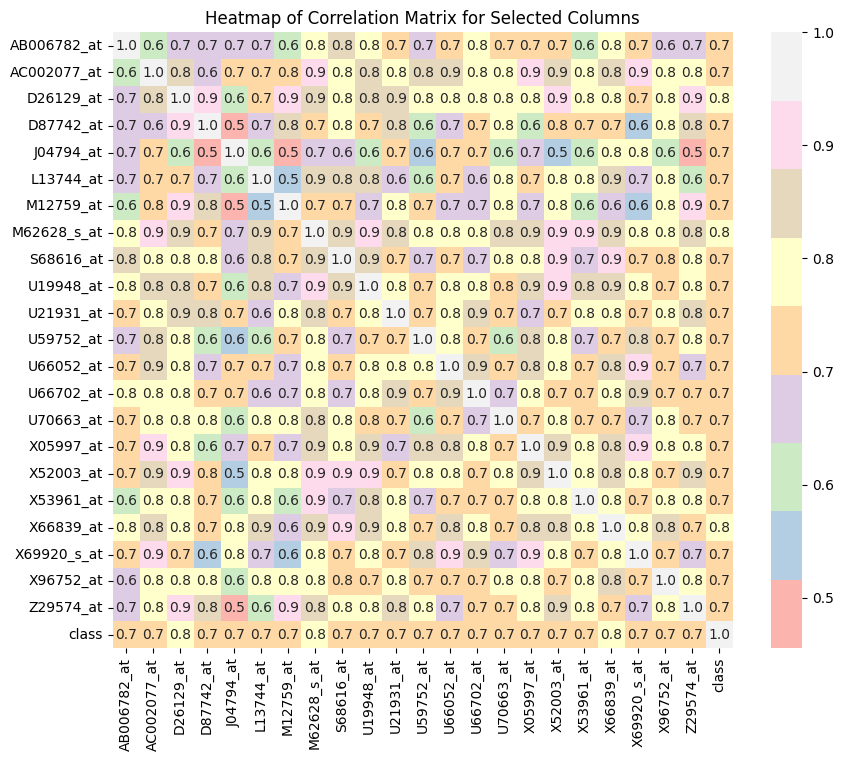

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".1f")
plt.title('Heatmap of Correlation Matrix for Selected Columns')
plt.show()

In [ ]:
abs(gast.corr())[['class']].style.background_gradient(cmap='BuPu')

,class
A28102_at,0.437786
AB000114_at,0.078743
AB000115_at,0.345179
AB000220_at,0.198264
AB000409_at,0.160345
AB000449_at,0.028913
AB000450_at,0.035786
AB000460_at,0.018524
AB000462_at,0.054368
AB000464_at,0.387437


**VISUALIZATION (COUNT PLOT)**:

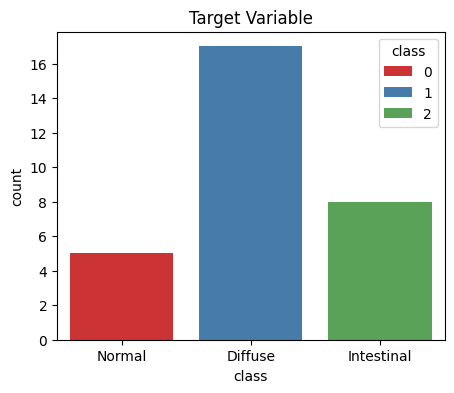

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='class',data=gast,hue='class',palette='Set1')
plt.title('Target Variable')
plt.xticks([0,1,2],['Normal', 'Diffuse', 'Intestinal'])
plt.show()

In [ ]:
gast['class'].value_counts()

1    17
2     8
0     5
Name: class, dtype: int64

In [ ]:
gast['class'].unique()

array([2, 0, 1])

### **SPLITING THE DATA:**

In [ ]:
#Spliting Data into X(independent) and Y(dependent):

x= gast.iloc[:,:-1].values
y= gast.iloc[:,-1].values

In [ ]:
print(x)

[[ 23.7   7.9  37.5 ... 136.3  30.2   0. ]
 [ 43.7   9.4  73.7 ... 133.   38.7   1. ]
 [ 16.7   3.9 202.3 ... 149.2  27.2   2. ]
 ...
 [ 27.7   6.8  40.6 ... 128.7  46.5  27. ]
 [ 30.4   5.1 116.6 ... 160.1  28.6  28. ]
 [ 79.   42.6 109.2 ...  98.7  82.8  29. ]]


In [ ]:
print(y)

[2 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(gast)

In [ ]:
#Dimensionality Reduction:

# Perform PCA (Principal Component Analysis) :
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
x_pca = pca.fit_transform(data_scaled)

print(x_pca)


[[ 44.27583837  -4.48564262]
 [ 31.31017289  -6.10413353]
 [  8.57846213 -21.03750875]
 [  9.58090338 -15.41783324]
 [ 28.89246675 -11.18272924]
 [ 55.39947719  11.00907107]
 [ 49.34206098   4.83191883]
 [ 82.42140355  29.74175687]
 [-17.06284068 -15.62937174]
 [ -0.21714802  -6.07442179]
 [-32.19390298  73.20569714]
 [ -6.50347687 -17.11921863]
 [ -5.25319693 -21.51691142]
 [ -4.21502022   7.42009986]
 [-32.92992276 -13.33297463]
 [-14.82962794   1.51149772]
 [ -4.10910209  -6.77463211]
 [-25.20090413  30.79782442]
 [-12.61655093  -5.60918408]
 [-30.89068639  16.52690303]
 [-27.2776491    7.98241167]
 [-20.16944492  -4.14582868]
 [ -3.42915758  -7.19306536]
 [-16.34053568  -1.62581486]
 [  1.26524573 -26.15267024]
 [-24.36496245  -7.04958519]
 [-23.37192352 -12.44577336]
 [-20.63641113  14.1921088 ]
 [-11.0421908   -7.11192865]
 [ 21.58862419  12.78993874]]


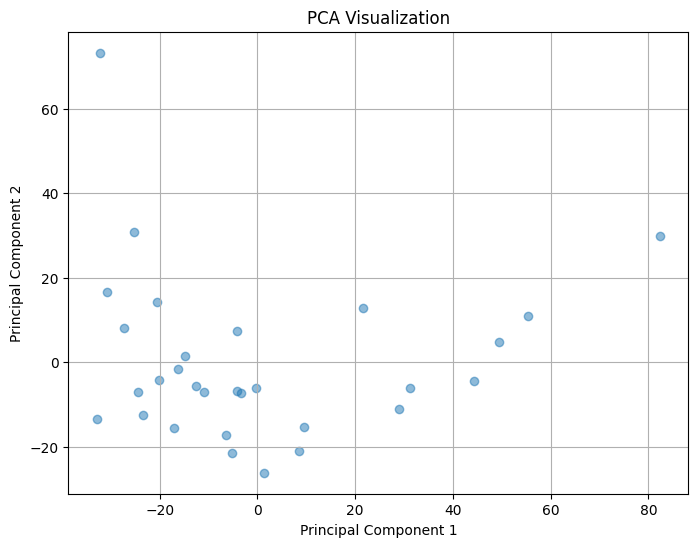

In [ ]:
# Visualize the results of PCA:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

**AUTO SPLIT:**

In [ ]:
#using auto split:
def performance(xtrain,xtest,ytrain,ytest,classifier):
  classifier.fit(xtrain,ytrain)
  ypred=classifier.predict(xtest)
  acc = accuracy_score(ytest,ypred)
  pre = precision_score(ytest,ypred,average='weighted',zero_division=1)
  rec = recall_score(ytest,ypred,average='weighted',zero_division=1)
  f1= f1_score(ytest,ypred,average='weighted',zero_division=1)
  return acc,pre,rec,f1

In [ ]:
def find_optimal_split_ratio(x, y, classifiers, splitting_ratios):
  optimal_ratio=None
  best_cls=None
  max_accuracy = 0.0
  header=["Test Ratio", "Classifier", "Accuracy","Precision","Recall","F1-score"]
  table_data = []
  for test_ratio in splitting_ratios:
     xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=test_ratio,random_state=0)
     for classifier_name, classifier in classifiers.items():
            accuracy, precision, recall, f1 = performance(xtrain, xtest, ytrain, ytest, classifier)
            row_data = [f"{test_ratio: .2f}",classifier_name,f"{accuracy: .4f}",f"{precision: .4f}",f"{recall: .4f}",f"{f1: .4f}"]
            table_data.append(row_data)
            if accuracy> max_accuracy:
              max_accuracy = accuracy
              optimal_ratio = test_ratio
              #return(x, y, classifiers, splitting_ratios)
  print(f"Optimal Splitting Ratio: {optimal_ratio:.2f}")
  print("best model:", best_cls)
  print(tabulate(table_data, headers=header, tablefmt="grid"))

In [ ]:
#xtrain,xtest,ytrain,ytest=find_optimal_split_ratio(x, y, classifiers, splitting_ratios)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
classifiers = {
    'RandomForest':RandomForestClassifier(),'Gradient_boost':GradientBoostingClassifier(),
    'DecisionTree':DecisionTreeClassifier(),'Logistic_Regression':LogisticRegression(),'Support_vector_classification':SVC()
    }

In [ ]:
print(type(classifiers))

<class 'dict'>


In [ ]:
splitting_ratios = np.linspace(0.1,0.9)
find_optimal_split_ratio(x, y, classifiers, splitting_ratios)

Optimal Splitting Ratio: 0.10
best model: None
+--------------+-------------------------------+------------+-------------+----------+------------+
|   Test Ratio | Classifier                    |   Accuracy |   Precision |   Recall |   F1-score |
+==============+===============================+============+=============+==========+============+
|         0.1  | RandomForest                  |     1      |      1      |   1      |     1      |
+--------------+-------------------------------+------------+-------------+----------+------------+
|         0.1  | Gradient_boost                |     0.6667 |      0.8333 |   0.6667 |     0.6667 |
+--------------+-------------------------------+------------+-------------+----------+------------+
|         0.1  | DecisionTree                  |     0.6667 |      1      |   0.6667 |     0.7778 |
+--------------+-------------------------------+------------+-------------+----------+------------+
|         0.1  | Logistic_Regression           |     

**MODELS:**

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.36, random_state=0)

In [ ]:
# Train a classifier (Random Forest) on the selected features
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Model:", accuracy1)

Accuracy of Random Forest Model: 0.7272727272727273


In [ ]:
# For classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(x_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
print(f'Accuracy fo Gradient boosting classifier: {accuracy3}')

Accuracy fo Gradient boosting classifier: 0.7272727272727273


In [ ]:
# Create a Decision Tree Classifier
# You can adjust hyperparameters such as max_depth, min_samples_split, etc.
dt_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier
dt_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(x_test)

# Evaluate the classifier
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy2)

Accuracy of Decision Tree: 0.9090909090909091


In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model performance
accuracy4 = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy of logistic Regression:", accuracy4)

Accuracy of logistic Regression: 0.6363636363636364


In [ ]:
# Support Vector Machine (SVM)

svm_model = SVC()
svm_model.fit(x_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(x_test)

# Evaluate the model performance
accuracy5 = accuracy_score(y_test, svm_y_pred)

# Print the results
print(f'Accuracy of SVM model: {accuracy5}')

Accuracy of SVM model: 0.8181818181818182


In [ ]:
models = ['Random forest classifier', 'Gradient Boosting classifier','Decision Tree classifier','Logistic regression','Support vector machine']
accuracy = [0.7272,0.7272,0.9090,0.6363,0.8181]

table_data = list(zip(models, accuracy))  #zip is used as function to combine the models and accuracy

headers = ['Model', 'Accuracy']

table = tabulate(table_data, headers=headers, tablefmt='grid')

print(table)

+------------------------------+------------+
| Model                        |   Accuracy |
+==============================+============+
| Random forest classifier     |     0.7272 |
+------------------------------+------------+
| Gradient Boosting classifier |     0.7272 |
+------------------------------+------------+
| Decision Tree classifier     |     0.909  |
+------------------------------+------------+
| Logistic regression          |     0.6363 |
+------------------------------+------------+
| Support vector machine       |     0.8181 |
+------------------------------+------------+
